In [13]:
import gzip
import brotli
import blosc

import timeit

import matplotlib.pyplot as plt
import numpy as np

import sys


In [3]:
with open("scripts/0-512_0-512_64-80", "rb") as rawfile:
    raw_data = rawfile.read()



In [14]:
gz_size, gz_qq, gz_results = [], [], []
for q in range(1, 10):
    comp_data = gzip.compress(raw_data, compresslevel=q)
    print(f"gzip q={q}", len(comp_data))
    gz_size.append(len(comp_data))
    q_res = %timeit -n1 -r5 -o gzip.compress(raw_data, compresslevel=q)
    gz_results.append(q_res)
    gz_qq.append(q)


gzip q=1 6556901
322 ms ± 9.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=2 6533999
353 ms ± 14.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=3 6505632
439 ms ± 21.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=4 6581718
522 ms ± 11.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=5 6554789
619 ms ± 8.45 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=6 6539717
686 ms ± 46.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=7 6539717
682 ms ± 34.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=8 6539717
686 ms ± 17 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip q=9 6539717
688 ms ± 16.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [8]:
br_results, br_size, qq = [], [], []
for q in range(1, 9):
    comp_data = brotli.compress(raw_data, quality=q)
    print(f"brotli q={q}", len(comp_data))
    br_size.append(len(comp_data))
    q_res = %timeit -n1 -r5 -o brotli.compress(raw_data, quality=q)
    br_results.append(q_res)
    qq.append(q)


brotli q=1 6698383
57.2 ms ± 4.12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=2 6523722
177 ms ± 18.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=3 6500608
199 ms ± 19.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=4 6634749
255 ms ± 6.25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=5 6111878
1.57 s ± 53.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=6 6043467
3.21 s ± 205 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=7 6035479
6.35 s ± 684 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=8 6034647
13.4 s ± 569 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [9]:
blosc_results, blosc_size, blosc_q = [], [], []
for q in range(3, 10):
    comp_data= blosc.compress(raw_data, clevel=q)
    print(f"blosc q={q}", len(comp_data))
    blosc_size.append(len(comp_data))
    q_res = %timeit -n1 -r5 -o blosc.compress(raw_data, clevel=q)
    blosc_results.append(q_res)
    blosc_q.append(q)


blosc q=3 8388624
7.78 ms ± 2.14 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=4 8380400
7.75 ms ± 884 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=5 8277772
8.57 ms ± 1.24 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=6 6783979
11.3 ms ± 904 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=7 6458747
11.5 ms ± 796 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=8 6458747
14.6 ms ± 1.22 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=9 6342151
16.3 ms ± 1.52 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Text(0.5, 0, 'compression level')

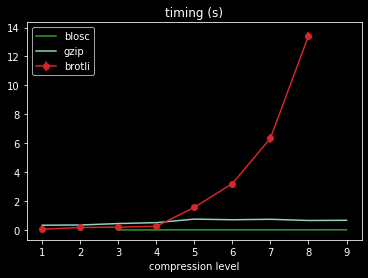

In [11]:
fig, ax1 = plt.subplots()
y = [sum(t.timings)/len(t.timings) for t in br_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in br_results]
h1 = ax1.errorbar(qq, y, yerr, fmt="-o", color='tab:red', label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_results]
h2 = ax1.plot(blosc_q, y, color='tab:green', label="blosc")

y = [sum(t.timings)/len(t.timings) for t in gz_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_results]
h3 = ax1.plot(gz_qq, y, label="gzip")


ax1.legend()
ax1.set_title("timing (s)")
ax1.set_xlabel("compression level")

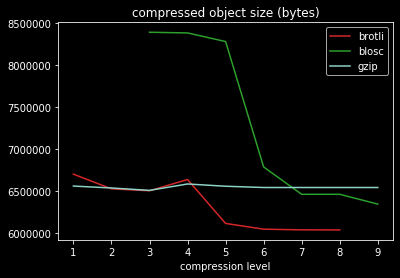

In [12]:
fig, ax2 = plt.subplots()
ax2.plot(qq, br_size, color='tab:red', label="brotli")
ax2.plot(blosc_q, blosc_size, color="tab:green", label="blosc")
ax2.plot(gz_qq, gz_size, label="gzip")
ax2.legend()

ax2.set_title("compressed object size (bytes)")
ax2.set_xlabel("compression level")

plt.show()
